In [151]:
# run this cell
from datascience import *
from pandas import read_stata
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

data = Table.read_table('Lab_3.csv')
data=data.drop("Annualized sum")
data=data.with_column('Master ID2', 0)
data['Master ID2']=data['Household ID']*100+data['Individual ID']
data

Household ID,Individual ID,Day of Birth,Month of Birth,Birth Year,Age,Sex,height,weight,Relationship to HH Head,Mother ID,Father ID,Education Level,Edu Class,Master ID,Day of Interview,Month of Interview,Year of Interview,Days Old,Years Old,Months Old,Master ID2
20111642,3,3,7,1976,31,2,-99,-99,9,-99,-99,2,5,20111642003,10,7,2007,11329.8,31.0404,372.485,2011164203
20111642,4,10,9,1995,11,2,-99,-99,5,3,2,-99,-99,20111642004,10,7,2007,4322,11.8411,142.093,2011164204
20111642,5,20,4,1997,10,1,-99,-99,5,3,2,-99,-99,20111642005,10,7,2007,3734,10.2301,122.762,2011164205
20111642,6,26,12,1999,7,1,-99,-99,5,3,2,-99,-99,20111642006,10,7,2007,2753.5,7.54384,90.526,2011164206
20111642,7,17,1,2000,7,1,-99,-99,5,3,2,-99,-99,20111642007,10,7,2007,2732.75,7.48699,89.8438,2011164207
20111642,8,26,5,2002,5,1,105.9,22.6,5,3,2,-99,-99,20111642008,10,7,2007,1871.25,5.12671,61.5205,2011164208
20111642,9,5,1,2005,2,2,80.5,9.5,5,3,2,-99,-99,20111642009,10,7,2007,918.5,2.51644,30.1973,2011164209
20111642,10,12,4,2006,1,2,70.3,7.1,5,3,2,-99,-99,20111642010,10,7,2007,454.75,1.24589,14.9507,2011164210
20113642,1,13,4,1966,41,1,-99,-99,1,-99,-99,-99,-99,20113642001,10,7,2007,15063.8,41.2705,495.247,2011364201
20113642,2,1,1,1969,38,2,-99,-99,2,-99,-99,-99,-99,20113642002,10,7,2007,14071.5,38.5521,462.625,2011364202


# Income
This week we are going to explore income inequality in your data.

For most of you, income data is in a separate data file.  Import this data file from Stata.

In [152]:
#importing

employment =  Table.from_df(read_stata('employment.dta', convert_categoricals=False).fillna(-99))
employment

hh_id,pid,jsn,occcode,q08a02,q08a03a,q08a03b,q08a03c,q08a03d,q08a03e,q08a03f,q08a03g,q08a03h,q08a03i,q08a03j,q08a03k,q08a03l,q08a04a,q08a04b,q08a04c,q08a04d,q08a04e,q08a04f,q08a04g,q08b_n,indcode,q08b03,q08b04,q08b05,q08b06,q08b07,q08b08,q08b09a,q08b09b,q08b10a,q08b10b,q08b12,q08b11a,q08b11b,q08b11c,q08b13a,q08b13b,q08b13c
20111642,1,1,6,C,2,2,1,1,1,1,1,1,1,2,2,2,4,4,4,4,4,4,0,,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
20111642,2,1,6,C,2,2,1,1,1,1,1,1,1,1,1,2,7,7,7,7,7,7,0,,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
20113642,1,1,6,C,2,2,1,1,1,1,1,1,1,1,2,2,5,5,5,5,5,5,0,,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
20114642,1,1,6,C,1,1,1,1,1,1,1,1,1,1,2,2,7,7,7,7,7,7,0,,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
20118642,1,1,6,C,1,1,1,1,1,1,1,1,1,1,1,1,6,6,6,6,6,6,0,,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
20118642,2,1,6,C,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,5,5,5,0,,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
20119642,1,1,6,C,2,2,2,1,1,1,1,1,2,2,1,1,6,6,6,6,6,6,0,,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
20121642,1,1,6,C,1,1,1,1,1,1,1,1,1,1,1,1,5,5,8,8,8,8,0,,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
20122642,1,1,6,C,1,1,1,1,1,1,1,1,1,1,1,1,6,6,6,6,6,0,0,,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
20123642,1,1,6,C,2,2,1,1,1,1,1,2,2,2,1,1,5,5,5,5,5,5,0,,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99


In [153]:
#renaming
employment_vars = ['hh_id', 'pid', 'q08b11a', 'q08b11b', 'q08b11c']
new_employment_vars = ['Household ID', 'Individual ID', 'Dollar', 'Number', 'Time Unit']
employment_renamed = employment.select(employment_vars).relabel(employment_vars, new_employment_vars)

We want to have a total yearly income for each person's job.  Make a new column that converts the payment to yearly payment.  To do this, you will use the time frame about which the question was asked: income daily, biweekly, monthly, yearly, etc. 

In [154]:
# you are going to want to change the return values in this function to fit your survey
# feel free to add as many elif clauses as necessary
def income_time_code(code):
    '''Converts the CODE to a constant for annualization of the income
    For example, if '1' corresponds to hour, we will convert it to a full time job.
    1 -- hour
    2 -- day
    3 -- week
    4 -- month '''
    code = int(code)
    if code == 1:
        return 40*52 #40 hours per week, 52 weeks per year
    elif code == 2:
        return 5*52 #5 days a week, 52 weeks per year
    elif code == 3:
        return 52 #52 weeks per year
    elif code == 4:
        return 12 #12 months per year

In [155]:
# time_coef should be an array of the values that must be multiplied to your income 
time_coef = employment_renamed.with_column('Time Coef', employment_renamed.apply(income_time_code, 'Time Unit'))

# A table with the bad values  filtered out
actual_data = time_coef.where(time_coef.apply(type, 'Time Coef') == int)

# Now multiply those time unit column and the column of their
# last paycheck together to get their annualized income
annualized = actual_data.with_column('Annualized', actual_data['Time Coef'] * actual_data['Dollar'])

employment_renamed = annualized
employment_renamed.show()

Household ID,Individual ID,Dollar,Number,Time Unit,Time Coef,Annualized
20326348,1,100,4,4,12,1200
20331348,1,15,1,4,12,180
20332348,1,15,1,4,12,180
20415635,1,140,1,4,12,1680
20421635,1,151,1,4,12,1812
20435635,2,150,1,4,12,1800
20439635,1,75,1,4,12,900
20535645,1,181.5,1,4,12,2178
20912515,1,100,2,4,12,1200
20912515,6,100,2,4,12,1200


In [156]:
employment_renamed.sort('Household ID').show()

Household ID,Individual ID,Dollar,Number,Time Unit,Time Coef,Annualized
20326348,1,100,4,4,12,1200
20331348,1,15,1,4,12,180
20332348,1,15,1,4,12,180
20415635,1,140,1,4,12,1680
20421635,1,151,1,4,12,1812
20435635,2,150,1,4,12,1800
20439635,1,75,1,4,12,900
20535645,1,181.5,1,4,12,2178
20912515,1,100,2,4,12,1200
20912515,6,100,2,4,12,1200


Create the master ID for your employment_renamed table. The append_master_id function that you used in Lab 1 is below if you need to use it.

In [157]:
def append_master_id(table, household_id_label="Household ID", individual_id_label="Individual ID"):
    #Fill in value of n. Should be 1 more than the number of digits of the largest number in the Household ID column.
    #n = 3
    household_col = table[household_id_label]
    individual_col = table[individual_id_label]
    master_col = []
    for household_id, individual_id in zip(household_col, individual_col):
        master_col.append(household_id * 100 + individual_id)
    return table.with_column('Master ID2', master_col)

In [158]:
employment_renamed = append_master_id(employment_renamed).drop(['Household ID', 'Individual ID'])

Some people may have multiple jobs.  Combine incomes so we only have one observation for each person.

In [159]:
# This line will show us how many individuals have more than one job
employment_renamed.group('Master ID2').sort('count', descending = True)

Master ID2,count
388243405,2
-1272724494,2
2143350801,1
2143150801,1
2142350801,1
2142150801,1
2141850802,1
2141850801,1
2141250801,1
2141150801,1


In [160]:
final_employment = employment_renamed.group('Master ID2', sum).drop('Number sum', 'Time Unit sum', 'Time Coef sum', 'Dollar sum')
final_employment.show()


Master ID2,Annualized sum
-2143713895,13000
-2143513895,1800
-2143213894,1800
-2141213894,1260
-2133815395,960
-2133415394,1800
-2133315391,1080
-2113416195,13000
-2083512595,4800
-2071616395,1920


Join this new data with columns "Master ID" & "Yearly Income" to your data from Lab 6.  After you join,  make sure you still have the right number of people in your data set!

In [161]:
def join_keeping_all_main_table_rows(main_table, joined, fill_in_value=-99, combining_column_label='Master ID2', using_labels='left'):
    #can change using_labels to 'outer' if you want to keep all values of joining column from both tables
    df_main_table = main_table.to_df()
    df_joined = joined.to_df()
    df_combined = df_main_table.merge(df_joined, on=combining_column_label, how=using_labels).fillna(fill_in_value)
    return Table.from_df(df_combined)

data = join_keeping_all_main_table_rows(data, final_employment)
data.show(3)


Household ID,Individual ID,Day of Birth,Month of Birth,Birth Year,Age,Sex,height,weight,Relationship to HH Head,Mother ID,Father ID,Education Level,Edu Class,Master ID,Day of Interview,Month of Interview,Year of Interview,Days Old,Years Old,Months Old,Master ID2,Annualized sum
20111642,3,3,7,1976,31,2,-99,-99,9,-99,-99,2,5,20111642003,10,7,2007,11329.8,31.0404,372.485,2011164203,-99
20111642,4,10,9,1995,11,2,-99,-99,5,3,2,-99,-99,20111642004,10,7,2007,4322,11.8411,142.093,2011164204,-99
20111642,5,20,4,1997,10,1,-99,-99,5,3,2,-99,-99,20111642005,10,7,2007,3734,10.2301,122.762,2011164205,-99


Save your data, we will be using this in future labs!

In [162]:
data.to_csv('Lab_6.csv')
hi=data.group("Annualized sum")
hi


Annualized sum,count
-99,22961
180,3
900,1
1200,11
1260,1
1272,1
1440,4
1476,3
1560,2
1680,1


<font color="Blue"> Item 1: Among those who are earning money, what is the average income earned monthly by the people in your data.  Convert this to dollars - if you can, use the conversion rates from the year of the survey.  

In [163]:
income_earners = data.where(data['Annualized sum'] >= 0)
np.mean(income_earners.column('Annualized sum')/12)

137.72549019607843

Now calculate total household income.  Use this and the number of people in the household to calculate household income per capita.

In [164]:
a = data.join('Household ID', data.group('Household ID').relabel('count', 'Household Size'))
a.show(1)

Household ID,Individual ID,Day of Birth,Month of Birth,Birth Year,Age,Sex,height,weight,Relationship to HH Head,Mother ID,Father ID,Education Level,Edu Class,Master ID,Day of Interview,Month of Interview,Year of Interview,Days Old,Years Old,Months Old,Master ID2,Annualized sum,Household Size
20111642,3,3,7,1976,31,2,-99,-99,9,-99,-99,2,5,20111642003,10,7,2007,11329.8,31.0404,372.485,2011164203,-99,8


In [165]:
b = income_earners.group('Household ID', sum).select('Household ID', 'Annualized sum sum').relabel('Annualized sum sum', 'Household Income')
b.show(1)

Household ID,Household Income
20326348,1200


In [166]:
curr = join_keeping_all_main_table_rows(a, b, fill_in_value=0, combining_column_label='Household ID')
curr.show(1)

Household ID,Individual ID,Day of Birth,Month of Birth,Birth Year,Age,Sex,height,weight,Relationship to HH Head,Mother ID,Father ID,Education Level,Edu Class,Master ID,Day of Interview,Month of Interview,Year of Interview,Days Old,Years Old,Months Old,Master ID2,Annualized sum,Household Size,Household Income
20111642,3,3,7,1976,31,2,-99,-99,9,-99,-99,2,5,20111642003,10,7,2007,11329.8,31.0404,372.485,2011164203,-99,8,0


In [167]:
per_capita = curr.with_column('Per Cap hh income', curr['Household Income'] / curr['Household Size'])
per_capita.where(per_capita['Per Cap hh income'] > 0)

Household ID,Individual ID,Day of Birth,Month of Birth,Birth Year,Age,Sex,height,weight,Relationship to HH Head,Mother ID,Father ID,Education Level,Edu Class,Master ID,Day of Interview,Month of Interview,Year of Interview,Days Old,Years Old,Months Old,Master ID2,Annualized sum,Household Size,Household Income,Per Cap hh income
20326348,1,26,10,1969,37,1,-99,-99,1,-99,-99,4,3,20326348001,11,9,2007,13834,37.9014,454.816,2032634801,1200,4,1200,300
20326348,2,9,7,1968,39,2,-99,-99,2,-99,-99,4,3,20326348002,11,9,2007,14307.8,39.1993,470.392,2032634802,-99,4,1200,300
20326348,3,16,12,1999,7,2,-99,-99,3,2,1,-99,-99,20326348003,11,9,2007,2825.5,7.7411,92.8932,2032634803,-99,4,1200,300
20326348,4,2,6,2007,0,1,65.2,5.2,3,2,1,-99,-99,20326348004,11,9,2007,100.5,0.275342,3.30411,2032634804,-99,4,1200,300
20331348,1,17,5,1959,48,1,-99,-99,1,-99,-99,2,5,20331348001,11,9,2007,17648,48.3507,580.208,2033134801,180,9,180,20
20331348,2,13,10,1970,36,2,-99,-99,2,-99,-99,-99,-99,20331348002,11,9,2007,13481.8,36.9363,443.236,2033134802,-99,9,180,20
20331348,3,21,6,1993,14,1,-99,-99,3,2,1,-99,-99,20331348003,11,9,2007,5195,14.2329,170.795,2033134803,-99,9,180,20
20331348,4,14,5,1995,12,2,-99,-99,3,2,1,-99,-99,20331348004,11,9,2007,4502,12.3342,148.011,2033134804,-99,9,180,20
20331348,5,30,12,1997,9,2,-99,-99,3,2,1,-99,-99,20331348005,11,9,2007,3542,9.70411,116.449,2033134805,-99,9,180,20
20331348,6,17,11,1999,7,1,-99,-99,3,2,1,-99,-99,20331348006,11,9,2007,2855,7.82192,93.863,2033134806,-99,9,180,20


In [168]:
hh_income = [float(x) for x in income_earners.group('Household ID', sum)['Annualized sum sum'] / income_earners.group('Household ID')['count']]
hh_income

[1200.0,
 180.0,
 180.0,
 1680.0,
 1812.0,
 1800.0,
 900.0,
 2178.0,
 1200.0,
 6000.0,
 1980.0,
 1200.0,
 1260.0,
 1776.0,
 1494.0,
 984.0,
 1800.0,
 1860.0,
 1440.0,
 2160.0,
 1680.0,
 1440.0,
 1800.0,
 1200.0,
 1800.0,
 1800.0,
 1440.0,
 2160.0,
 1788.0,
 3000.0,
 1200.0,
 1440.0,
 1200.0,
 1200.0,
 1200.0,
 1560.0,
 2880.0,
 1800.0,
 1374.0,
 2400.0,
 2160.0,
 1800.0,
 1476.0]

<font color="Blue"> Item 2: What is the average household income per capita? (Note: make sure your denominator is households, not individuals.) Convert to dollars.  Compare this to the World Bank's interational poverty line of $xxx a day.  

In [169]:
np.mean(hh_income)

1694.9302325581396

In [170]:
# households with an income
international_poverty_line_percentage = (np.array(hh_income) > (1.9 * 365)).mean()
international_poverty_line_percentage

0.95348837209302328

In [171]:
# all households
international_poverty_line_percentage * len(hh_income) / data.group('Household ID').num_rows

0.0093543235227013469

<font color="Blue"> Item 3: What percentage of households live below your country's poverty line (you will have to look this up - could be different from the World Bank poverty line.)

In [172]:
# timor leste's is 88 cents per capita per day
national_poverty_line = (np.array(hh_income) > (.88 * 365)).mean()
national_poverty_line

0.95348837209302328

In [173]:
national_poverty_line * len(hh_income) / data.group('Household ID').num_rows

0.0093543235227013469

## Income inequality - the Lorenz Curve & Gini Coefficent
Examining the poverty line is one way to consider income inquality.  Another way is to look at concentration of wealth.  The Lorenz curve is a graphical illustration of this and the Gini Coefficient is a numeric representation.  The Lorenz curve lines up the population from poorest to richest on the x axis, and then the y-axis graphs cumulative income of all the people poorer than the one on the x axis.  To make these comparable across countries, these are translated into percentages.  (0,0) and (100,100) are always the end points of the curve: 0% of the people own nothing while 100% of the people own 100% of the wealth.  

Let's line up our **individual income earners** to look at inequality just among income earners.  Let's start with a fresh table, with the column of the income.  Let's put the table of incomes in order from lowest to highest.  Then let's make a new column, that adds up all incomes above the row.  Here's an example:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-baqh">Income</th>
    <th class="tg-baqh">Cumulative Income</th>
  </tr>
  <tr>
    <td class="tg-baqh">3</td>
    <td class="tg-baqh">3</td>
  </tr>
  <tr>
    <td class="tg-baqh">3</td>
    <td class="tg-baqh">6</td>
  </tr>
  <tr>
    <td class="tg-baqh">4</td>
    <td class="tg-baqh">10</td>
  </tr>
  <tr>
    <td class="tg-baqh">7</td>
    <td class="tg-baqh">17</td>
  </tr>
  <tr>
    <td class="tg-baqh">8</td>
    <td class="tg-baqh">26</td>
  </tr>
</table>

In [174]:
ordered_incomes = [float(x) for x in income_earners.sort('Annualized sum').column('Annualized sum')]

In [175]:
total = 0
cumulative_step = []
for x in ordered_incomes:
    total = x + total
    cumulative_step.append(total)

In [176]:
lorenz_table = Table().with_columns(
    ['Income', ordered_incomes],
    ['Cumulative Income', cumulative_step])
lorenz_table

Income,Cumulative Income
180,180
180,360
180,540
900,1440
1200,2640
1200,3840
1200,5040
1200,6240
1200,7440
1200,8640


Now we will need to turn these into percentages.  Go to the last row of the table.  This will tell you the total amount of income in the economy.  We will divide the Cumulative Income column by this number.  In the example, that is 25.  Although my table shows the percent sign, you do not have to include the percent sign in your table.  In fact, there will be one less step for graphing if you do not include the percent sign.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-baqh">Income</th>
    <th class="tg-baqh">Cumulative Income</th>
    <th class="tg-yw4l">Percentage Income</th>
  </tr>
  <tr>
    <td class="tg-baqh">3</td>
    <td class="tg-baqh">3</td>
    <td class="tg-yw4l">12%</td>
  </tr>
  <tr>
    <td class="tg-baqh">3</td>
    <td class="tg-baqh">6</td>
    <td class="tg-yw4l">24%</td>
  </tr>
  <tr>
    <td class="tg-baqh">4</td>
    <td class="tg-baqh">10</td>
    <td class="tg-yw4l">40%</td>
  </tr>
  <tr>
    <td class="tg-baqh">7</td>
    <td class="tg-baqh">17</td>
    <td class="tg-yw4l">68%</td>
  </tr>
  <tr>
    <td class="tg-baqh">8</td>
    <td class="tg-baqh">25</td>
    <td class="tg-yw4l">100%</td>
  </tr>
</table>


In [177]:
total_income = sum(ordered_incomes)
percents = []
for x in cumulative_step:
    percent = x / total_income
    percents.append(percent)

In [178]:
lorenz_table = lorenz_table.with_column('Percentage Income', percents)

Now we need to put the population in terms of percentage.  Add a new column that counts the income earners.  As in this table, there may be some people that have the same income.  It does not matter which order these go in.  Again, go to the last row and divide the count column by the total number of income earners.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-baqh">Income</th>
    <th class="tg-baqh">Cumulative Income</th>
    <th class="tg-yw4l">Percentage Income</th>
    <th class="tg-yw4l">Count</th>
    <th class="tg-yw4l">Percentage Population</th>
  </tr>
  <tr>
    <td class="tg-baqh">3</td>
    <td class="tg-baqh">3</td>
    <td class="tg-yw4l">12%</td>
    <td class="tg-yw4l">1</td>
    <td class="tg-yw4l">20%</td>
  </tr>
  <tr>
    <td class="tg-baqh">3</td>
    <td class="tg-baqh">6</td>
    <td class="tg-yw4l">24%</td>
    <td class="tg-yw4l">2</td>
    <td class="tg-yw4l">40%</td>
  </tr>
  <tr>
    <td class="tg-baqh">4</td>
    <td class="tg-baqh">10</td>
    <td class="tg-yw4l">40%</td>
    <td class="tg-yw4l">3</td>
    <td class="tg-yw4l">60%</td>
  </tr>
  <tr>
    <td class="tg-baqh">7</td>
    <td class="tg-baqh">17</td>
    <td class="tg-yw4l">68%</td>
    <td class="tg-yw4l">4</td>
    <td class="tg-yw4l">80%</td>
  </tr>
  <tr>
    <td class="tg-baqh">8</td>
    <td class="tg-baqh">26</td>
    <td class="tg-yw4l">100%</td>
    <td class="tg-yw4l">5</td>
    <td class="tg-yw4l">100%</td>
  </tr>
</table>

In [179]:
count = 0
spot = []
pop_percent = []
total_pop = len(ordered_incomes)

for i in ordered_incomes:
    count += 1
    spot.append(count)
    pop_percent.append(count / total_pop)

In [180]:
lorenz_table = lorenz_table.with_column(
        'Count', spot).with_column('Percentage Population', pop_percent)

We are missing the 0,0 row at the begining.  Add this row in.  You have not been using percentage signs in your table, so you don't need to add them in for the these zeros either.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-baqh">Income</th>
    <th class="tg-baqh">Cumulative Income</th>
    <th class="tg-yw4l">Percentage Income</th>
    <th class="tg-yw4l">Count</th>
    <th class="tg-yw4l">Percentage Population</th>
  </tr>
  <tr>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l">0%</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l">0%</td>
  </tr>
  <tr>
    <td class="tg-baqh">3</td>
    <td class="tg-baqh">3</td>
    <td class="tg-yw4l">12%</td>
    <td class="tg-yw4l">1</td>
    <td class="tg-yw4l">20%</td>
  </tr>
  <tr>
    <td class="tg-baqh">3</td>
    <td class="tg-baqh">6</td>
    <td class="tg-yw4l">24%</td>
    <td class="tg-yw4l">2</td>
    <td class="tg-yw4l">40%</td>
  </tr>
  <tr>
    <td class="tg-baqh">4</td>
    <td class="tg-baqh">10</td>
    <td class="tg-yw4l">40%</td>
    <td class="tg-yw4l">3</td>
    <td class="tg-yw4l">60%</td>
  </tr>
  <tr>
    <td class="tg-baqh">7</td>
    <td class="tg-baqh">17</td>
    <td class="tg-yw4l">68%</td>
    <td class="tg-yw4l">4</td>
    <td class="tg-yw4l">80%</td>
  </tr>
  <tr>
    <td class="tg-baqh">8</td>
    <td class="tg-baqh">26</td>
    <td class="tg-yw4l">100%</td>
    <td class="tg-yw4l">5</td>
    <td class="tg-yw4l">100%</td>
  </tr>
</table>

In [181]:
#lorenz_table = lorenz_table.with_row([0,0,0,0,0]).sort('Count')

You are ready to graph the Lorenz curve! 
<font color="Blue"> Item 4: Make a line graph with percentage population on the x axis and percentage income on the y axis.

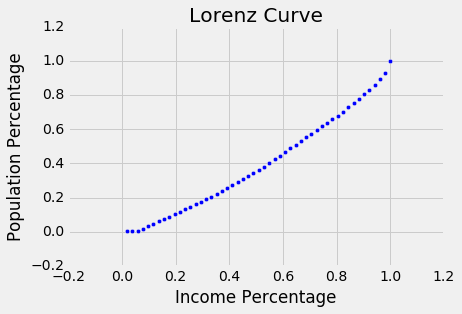

In [182]:
x_values = lorenz_table['Percentage Population']
y_values = lorenz_table['Percentage Income']

plots.xlabel('Income Percentage')
plots.ylabel('Population Percentage')
plots.title('Lorenz Curve')

plots.scatter(x_values,y_values)

<font color="Blue"> Item 5: Calculate the Gini coefficient.
<font color="Black">The Gini coefficient is the area between the line and the 45% line.  It is the sum of the differences between Percent Population and Percent Income divided by the sum of Percent Population.  This number is between 0 and 1.  Consider if a smaller number represents more inequality and what the relationship of the formula to the graph is.  

$$ \frac{\Sigma_{i=1}^{N} (\% Pop_i - \% Inc_i)}{\Sigma_{i=1}^{N} \% Pop_i}$$

Note that if there were perfect equality, $\% Pop_i = \% Inc_i$.

In [183]:
differences = []
for pop, inc in list(zip(lorenz_table['Percentage Population'], lorenz_table['Percentage Income'])):
    diff = pop - inc
    differences.append(diff)
sum(differences)/sum(lorenz_table['Percentage Population'])

0.21542349307867528

<font color="Blue"> Items 4a & 5a: Repeat Items 4 & 5, but instead of using individuals who earn, use all individuals, using household income per capita as the income for each person in the household.  Is there more or less inquality among households or among individual earners as measured by the Lorenz curve & Gini coefficient?

<font color="Blue"> Item 6: We use Household Income Per Capita, assuming that everyone in the household consumes and equal share of the earnings.  Do you think this is accurate?  If not, and we could accurately measure how much each person consumed in the household, how would using individual consumption instead of average income change our measures of inequality?